# DAT200 - CA03 - Fábio Rodrigues Pereira
- faro@nmbu.no
- kaggle: @fabiorodp

# **Import necessaries libraries:**

In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from mlxtend.feature_selection import SequentialFeatureSelector as SFS

# **Import the databases and pre-training verifications:**

In [4]:
df = pd.read_csv("train.csv", index_col="ID")
df_test = pd.read_csv("test.csv", index_col="ID")
print("Train dimension: ", df.shape,
      "\nTest dimension: ", df_test.shape)

Train dimension:  (7108, 25) 
Test dimension:  (3828, 24)


In [5]:
# Verify null and duplucated features and classes:
print("Train Data Frame:", 
      "\n# of null features and classes:", df.isnull().any().sum(),
      "\n# of duplicated features and classes:", df.duplicated().sum(),
      "\n\nTest Data Frame:",
      "\n# of duplicated features and classes:", df_test.isnull().any().sum(),
      "\n# of duplicated features and classes:", df_test.duplicated().sum())

Train Data Frame: 
# of null features and classes: 0 
# of duplicated features and classes: 0 

Test Data Frame: 
# of duplicated features and classes: 0 
# of duplicated features and classes: 0


In [6]:
# Verify the size of each target class:
print(df.groupby("label").size())

label
0.0    2473
1.0    2770
2.0    1865
dtype: int64


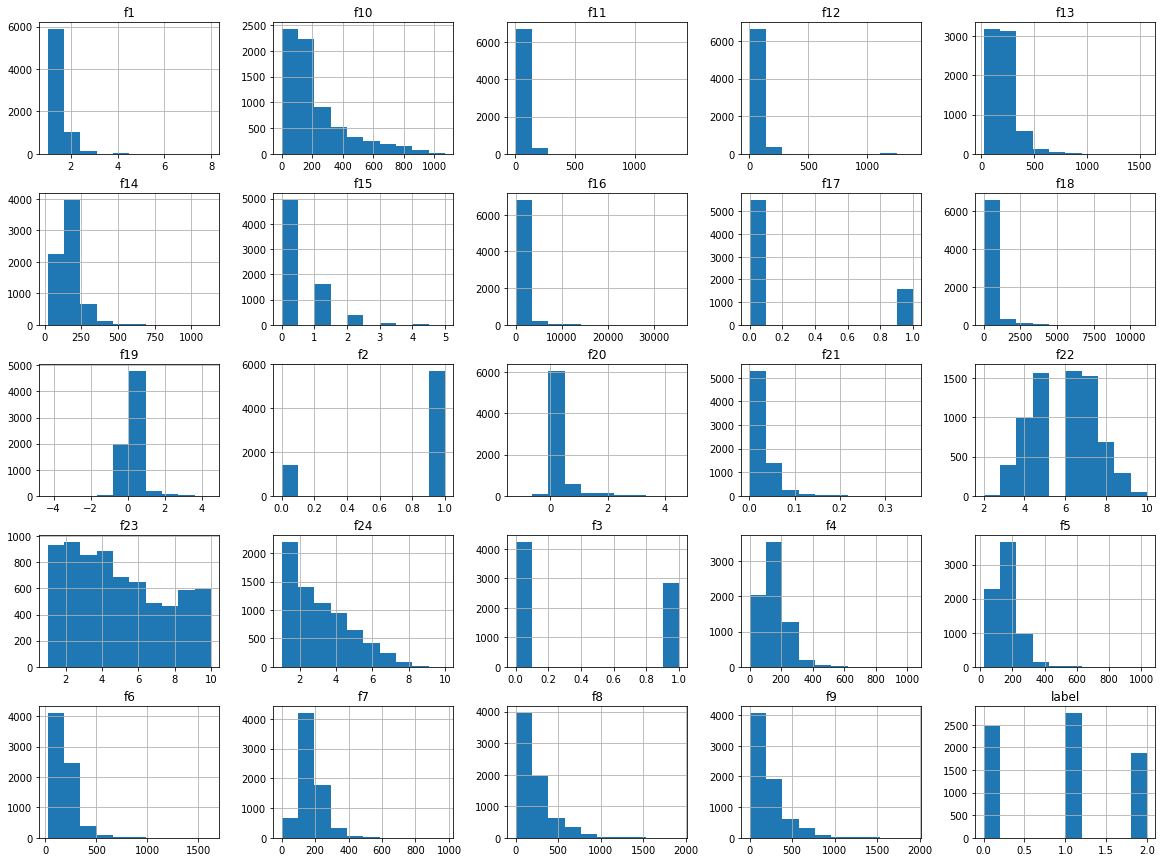

In [7]:
# Verify the histograms for distribution analysis:
df.hist(figsize=(20, 15), bins=10)
plt.show()

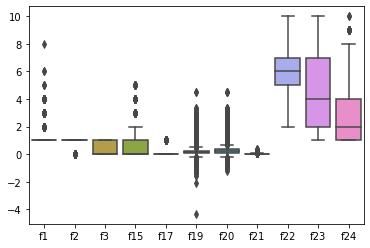

In [8]:
# Verify boxplot for outliners:
# Features ["f1", "f2", "f3", "f15", "f17", "f19", "f20", "f21", "f22",
# "f23", "f24"]:
sns.boxplot(data=df[["f1", "f2", "f3", "f15", "f17", "f19", "f20", "f21",
                     "f22", "f23", "f24"]])
plt.show()

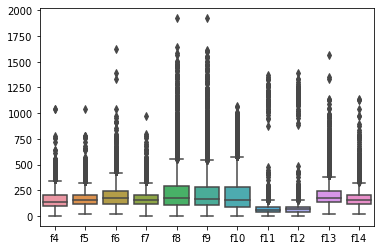

In [9]:
# Verify boxplot for outliners:
# Features ["f4", "f5", "f6", "f7", "f8", "f9", "f10", "f11", "f12", "f13",
# "f14"]:
sns.boxplot(data=df[["f4", "f5", "f6", "f7", "f8", "f9", "f10", "f11", "f12", 
                     "f13", "f14"] ])
plt.show()

# **Scenario 1: Trainning raw data with Random Forest Classifier:**

## **1.1: Parameters tunning:**

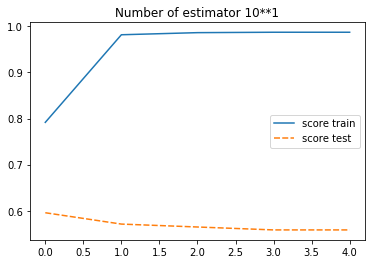

Raw data frame (df):

 Train scores:  [0.7917692578262399, 0.981885332395357, 0.9864579669363348, 0.9873373197326768, 0.9873373197326768]

 Test scores:  [0.5956399437412095, 0.5710267229254571, 0.5646976090014064, 0.5583684950773559, 0.5583684950773559]


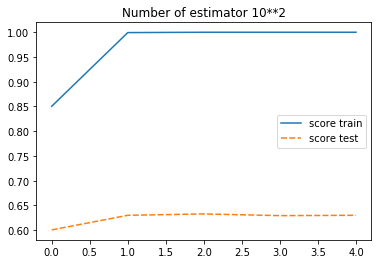

Raw data frame (df):

 Train scores:  [0.8503341540626099, 0.9992965177629265, 1.0, 1.0, 1.0]

 Test scores:  [0.60056258790436, 0.630098452883263, 0.6329113924050633, 0.629395218002813, 0.630098452883263]


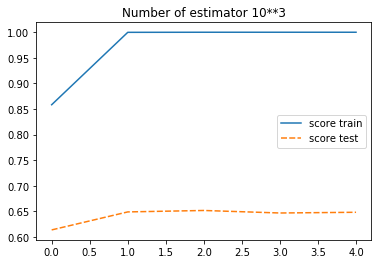

Raw data frame (df):

 Train scores:  [0.8584241997889553, 0.9998241294407316, 1.0, 1.0, 1.0]

 Test scores:  [0.6139240506329114, 0.6490857946554149, 0.6518987341772152, 0.6469760900140648, 0.6483825597749648]


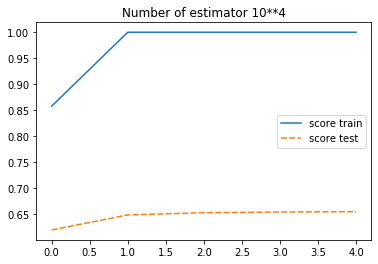

Raw data frame (df):

 Train scores:  [0.8577207175518818, 1.0, 1.0, 1.0, 1.0]

 Test scores:  [0.6195499296765119, 0.6483825597749648, 0.6526019690576652, 0.6540084388185654, 0.6547116736990155]


In [25]:
# Split X and y from df:
X = df.iloc[:, :-1]
X = X.values
y = df.iloc[:, -1]
y = y.values

# Tunning parameter n_estimators:
for n_estimators in range(1, 5):
  score_train = []
  score_test = []

  # Tunning parameter max_depth:
  for max_depth in range(10, 51, 10):
    # Split train and test data frame:
    X_train, X_test, y_train, y_test = \
      train_test_split(X, y, test_size=0.2, random_state=100, stratify=y)

    # Call the model and train:
    rf = RandomForestClassifier(n_estimators=10**n_estimators, 
                                criterion="gini",
                                max_depth=max_depth, 
                                n_jobs=-1, 
                                random_state=100)
    
    rf.fit(X_train, y_train)
        
    score_train.append(rf.score(X_train, y_train))
    score_test.append(rf.score(X_test, y_test))

  sns.lineplot(data=pd.DataFrame(np.array((score_train, score_test)).T,
                                 columns=["score train", "score test"])
              ).set_title("Number of estimator 10**{}".format(n_estimators))
  plt.show()

  print("Raw data frame (df):")
  print("\n Train scores: ", score_train)
  print("\n Test scores: ", score_test)

## **1.2: Using parameters of the best test score achieved:**

In [27]:
# The best score achieved was (0.6547116736990155) for n_estimators==10**4 and 
# max_depth=50.

# Split X and y from df:
X = df.iloc[:, :-1]
X = X.values
y = df.iloc[:, -1]
y = y.values

# Split train and test data frame:
X_train, X_test, y_train, y_test = \
  train_test_split(X, y, test_size=0.2, random_state=100, stratify=y)

# Call the model and train:
rf = RandomForestClassifier(n_estimators=10**4, 
                            criterion="gini",
                            max_depth=50, 
                            n_jobs=-1, 
                            random_state=100)
    
rf.fit(X_train, y_train)
        
score_train = rf.score(X_train, y_train)
score_test = rf.score(X_test, y_test)

print("Raw data frame (df):")
print("\n Train scores: ", score_train)
print("\n Test scores: ", score_test)

Raw data frame (df):

 Train scores:  1.0

 Test scores:  0.6547116736990155


In [0]:
# To csv:
pd.DataFrame(rf.predict(df_test.values))\
  .to_csv("/content/drive/My Drive/Colab Notebooks/rf_raw.csv", 
          float_format="%d")

**Conclusion:** The score achieved on kaggle was: 0.66509

## **1.3: Using parameters of the second best test score achieved:**

In [29]:
# I will try the parameters n_estimators==10**3 and max_depth=30, because is 
# computationally less expensive and it does not have much difference from the
# previous test score.

# Split X and y from df:
X = df.iloc[:, :-1]
X = X.values
y = df.iloc[:, -1]
y = y.values

# Split train and test data frame:
X_train, X_test, y_train, y_test = \
  train_test_split(X, y, test_size=0.2, random_state=100, stratify=y)

# Call the model and train:
rf = RandomForestClassifier(n_estimators=10**3, 
                            criterion="gini",
                            max_depth=30, 
                            n_jobs=-1, 
                            random_state=100)
    
rf.fit(X_train, y_train)
        
score_train = rf.score(X_train, y_train)
score_test = rf.score(X_test, y_test)

print("Raw data frame (df):")
print("\n Train scores: ", score_train)
print("\n Test scores: ", score_test)

Raw data frame (df):

 Train scores:  1.0

 Test scores:  0.6518987341772152


In [0]:
# To csv:
pd.DataFrame(rf.predict(df_test.values))\
  .to_csv("/content/drive/My Drive/Colab Notebooks/rf_raw2.csv", 
          float_format="%d")

**Conclusion:** The score achieved on kaggle was: 0.67032. The score here was even better than the score achieved when the parameters was higher. This means that we had overfitting when the parameters was higher.

# **Scenario 2: Removing all sample outliers using quantile technnique and Random Forest:**

In [70]:
def quantile_technique(df, column):
    q1 = df[column].quantile(q=0.25)
    q3 = df[column].quantile(q=0.75)
    iqr = q3 - q1
    q0 = q1 - (1.5*iqr)
    q4 = q3 + (1.5*iqr)
    return df[(df[column] < q0)].index.tolist() + \
        df[(df[column] > q4)].index.tolist()

# Take the indexes of the outliers:
outliers_qtl = []
for i in df.columns:
    outliers_qtl += quantile_technique(df, i)
outliers_qtl = set(outliers_qtl)

print(len(outliers_qtl))


5039


**Conclusion:** Not feasible to use this approche because many importante samples and informations will be removed when we drop the outliers.

# **Scenario 3: Removing only sample outliers above 1.000 and Random Forest:**

In [67]:
# Get indexes of outliers with values above or equal 1.000:
outliers_a1000 = []
for col in df.columns:
  outliers_a1000 += df[(df[col]>=1000)].index.tolist()
outliers_a1000 = set(outliers_a1000)
print(len(outliers_a1000))

# Create a new data frame without the dropped indexes: 
df1a = df.drop(index=outliers_a1000)
print(df1a.shape)

# Split X and y from df:
X = df1a.iloc[:, :-1]
X = X.values
y = df1a.iloc[:, -1]
y = y.values

# Split train and test data frame:
X_train, X_test, y_train, y_test = \
  train_test_split(X, y, test_size=0.2, random_state=100,
                   stratify=y)

# Call the model and train:
rf = RandomForestClassifier(n_estimators=10**3, 
                            criterion="gini",
                            max_depth=30, 
                            n_jobs=-1, 
                            random_state=100)

rf.fit(X_train, y_train)

score_train = rf.score(X_train, y_train)
score_test = rf.score(X_test, y_test)

print("Raw data frame (df):")
print("\n Train scores: ", score_train)
print("\n Test scores: ", score_test)

1330
(5778, 25)
Raw data frame (df):

 Train scores:  1.0

 Test scores:  0.6081314878892734


**Conclusion:** Test score less than scenario 1.3, then there is no improvement.

# **Scenario 4: All target classes balanced and oversampled. Trainning with Random Forest:**

In [64]:
# 1a) Devide the samples according to the target class:
df2b_majority = df[df.label == 1]
df2b_middle = df[df.label == 0]
df2b_minority = df[df.label == 2]

# 2a) Oversample the data frames:
df2b_majority_oversampled = resample(df2b_majority, replace=True,
                                     n_samples=20000, random_state=100)

df2b_minority_oversampled = resample(df2b_minority, replace=True,
                                     n_samples=20000, random_state=100)

df2b_middle_oversampled = resample(df2b_middle, replace=True,
                                   n_samples=20000, random_state=100)

# 3a) Combine oversampled classes:
df2b = pd.concat([df2b_minority_oversampled, df2b_middle_oversampled,
                 df2b_majority_oversampled])

# 4) Display new class counts:
print("df2b:\n", df2b.label.value_counts())


# Split X and y from df:
X = df2b.iloc[:, :-1]
X = X.values
y = df2b.iloc[:, -1]
y = y.values

# Split train and test data frame:
X_train, X_test, y_train, y_test = \
  train_test_split(X, y, test_size=0.2, random_state=100,
                   stratify=y)

# Call the model and train:
rf = RandomForestClassifier(n_estimators=10**4, 
                            criterion="gini",
                            max_depth=50, 
                            n_jobs=-1, 
                            random_state=100)

rf.fit(X_train, y_train)

score_train = rf.score(X_train, y_train)
score_test = rf.score(X_test, y_test)

print("Raw data frame (df):")
print("\n Train scores: ", score_train)
print("\n Test scores: ", score_test)

df2b:
 1.0    20000
0.0    20000
2.0    20000
Name: label, dtype: int64
Raw data frame (df):

 Train scores:  1.0

 Test scores:  0.9990833333333333


In [0]:
# To csv:
pd.DataFrame(rf.predict(df_test.values))\
  .to_csv("/content/drive/My Drive/Colab Notebooks/rf2b.csv", 
          float_format="%d")

**Conclusion:** The train and test score achieved in this scenario was very high, but it was expected because of the oversample. Oversample leads to higher variance, then less accuracy. **Kaggle score was 0,69226, slightly higher than the scenario 1.2 or 1.3 whithout any feature analyze.**

# **Scenario 5: Feature Importance and Random Forest:**

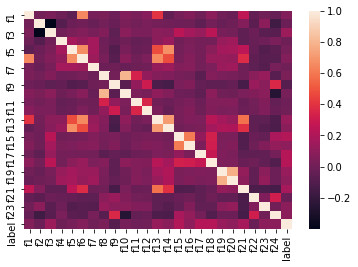

In [76]:
# Check correlation between variables:
sns.heatmap(data=df.corr())
plt.show()

**Not many features have high correlations.**

In [75]:
# Split X and y from df:
X = df.iloc[:, :-1]
X = X.values
y = df.iloc[:, -1]
y = y.values

# =============================================================================
# Compute permutation feature importances from mlxtend
# =============================================================================

from mlxtend.evaluate import feature_importance_permutation

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=100)

rfs = RandomForestClassifier(n_estimators=10**3, criterion="gini", 
                             max_depth=30, n_jobs=-1,
                             random_state=100)

rfs.fit(X_train, y_train)
print(rfs.score(X_test, y_test))
 
# Compute importances from training and test data
imp_vals, imp_all = feature_importance_permutation(
    predict_method=rfs.predict,
    X=X_test,
    y=y_test,
    metric='accuracy',
    num_rounds=100,
    seed=100)

# Collect importances of each feature
print('\n', imp_vals)
print('\n', imp_all)

0.6518987341772152

 [ 0.00349508  0.00345992  0.01164557  0.0035865   0.00414205  0.00256681
  0.00640647  0.00052039  0.0369339   0.00315752  0.00200422  0.00608298
 -0.00329817 -0.00580169  0.01035162  0.01774965  0.02874121  0.1042827
  0.01829114  0.01276371  0.04106892  0.06678622  0.0571308   0.02269339]

 [[0.00492264 0.00351617 0.00351617 ... 0.00281294 0.00492264 0.00351617]
 [0.00351617 0.00351617 0.00562588 ... 0.00492264 0.00351617 0.00351617]
 [0.00984529 0.01476793 0.00984529 ... 0.00351617 0.01547117 0.00843882]
 ...
 [0.04500703 0.06610408 0.06891702 ... 0.05696203 0.07805907 0.05766526]
 [0.06891702 0.06821378 0.05907173 ... 0.05274262 0.0604782  0.06118143]
 [0.01687764 0.02883263 0.01898734 ... 0.01195499 0.02953586 0.02250352]]


## **5.1) Only the 17th best features from permutation approach:**

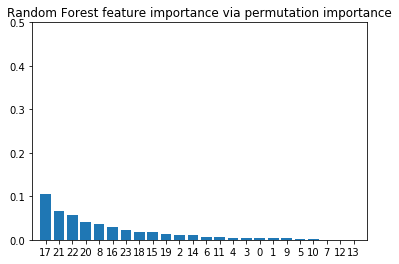

In [79]:
# Visualization of Feature permutation importance (mlxtend):
indices = np.argsort(imp_vals)[::-1]
plt.figure()
plt.title("Random Forest feature importance via permutation importance")
plt.bar(range(X.shape[1]), imp_vals[indices])
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.ylim([0, 0.5])
plt.show()

In [115]:
# Worst features: (label above + 1) = ["f14", "f13", "f8", "f11"]
# Split X and y from df:
drop_cols_fip = ["f14", "f13", "f8", "f11", "f6", "f10", "f2"]
df_fip = df.drop(columns=drop_cols_fip)
X1 = df_fip.iloc[:, :-1]
X1 = X1.values
y1 = df_fip.iloc[:, -1]
y1 = y1.values

X1_train, X1_test, y1_train, y1_test = train_test_split(
    X1, y1, test_size=0.2, stratify=y1, random_state=100)

rf_fip = RandomForestClassifier(n_estimators=10**3, criterion="gini", 
                                max_depth=30, n_jobs=-1, random_state=100)

rf_fip.fit(X1_train, y1_train)

print('Training accuracy:', rf_fip.score(X1_train, y1_train))
print('Test accuracy:', rf_fip.score(X1_test, y1_test))

Training accuracy: 1.0
Test accuracy: 0.6835443037974683


In [0]:
# To csv:
df_test_fip = df_test.drop(columns=drop_cols_fip)
pd.DataFrame(rf_fip.predict(df_test_fip.values))\
  .to_csv("/content/drive/My Drive/Colab Notebooks/rf_fip5.csv", 
          float_format="%d")

**Conclusion**: Kaggle score 0.68861. Slightly improvement, but still not above scenario 4.

## **5.2) Combined scenarios 1.3 and 4 and 5.1:**

In [116]:
# Split X and y from df:
drop_cols_fip = ["f14", "f13", "f8", "f11", "f6", "f10", "f2"]
df_fip = df.drop(columns=drop_cols_fip)

# 1a) Devide the samples according to the target class:
df2b_majority = df_fip[df_fip.label == 1]
df2b_middle = df_fip[df_fip.label == 0]
df2b_minority = df_fip[df_fip.label == 2]

# 2a) Oversample the data frames:
df2b_majority_oversampled = resample(df2b_majority, replace=True,
                                     n_samples=20000, random_state=100)

df2b_minority_oversampled = resample(df2b_minority, replace=True,
                                     n_samples=20000, random_state=100)

df2b_middle_oversampled = resample(df2b_middle, replace=True,
                                   n_samples=20000, random_state=100)

# 3a) Combine oversampled classes:
df2b = pd.concat([df2b_minority_oversampled, df2b_middle_oversampled,
                 df2b_majority_oversampled])

# 4) Display new class counts:
print("df2b:\n", df2b.label.value_counts())
X9 = df2b.iloc[:, :-1]
X9 = X9.values
y9 = df2b.iloc[:, -1]
y9 = y9.values

X9_train, X9_test, y9_train, y9_test = train_test_split(
    X9, y9, test_size=0.2, stratify=y9, random_state=100)

rf_fip2 = RandomForestClassifier(n_estimators=10**3, criterion="gini", 
                                max_depth=30, n_jobs=-1, random_state=100)

rf_fip2.fit(X9_train, y9_train)

print('Training accuracy:', rf_fip2.score(X9_train, y9_train))
print('Test accuracy:', rf_fip2.score(X9_test, y9_test))

df2b:
 1.0    20000
0.0    20000
2.0    20000
Name: label, dtype: int64
Training accuracy: 1.0
Test accuracy: 0.9991666666666666


In [0]:
# To csv:
df_test_fip = df_test.drop(columns=drop_cols_fip)
pd.DataFrame(rf_fip2.predict(df_test_fip.values))\
  .to_csv("/content/drive/My Drive/Colab Notebooks/rf_fip9.csv", 
          float_format="%d")

**Conclusion:** I combined scenario approaches 1.3: n_estimators=10000 and max_depth=30; with 5.1: feature selection by permutation (mlxtend); with 4: oversampled and balanced target classes. **Kaggle score: 0.70689. Slightly improvement and I got the best accuracy here.**